# ML Experiment 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/VIT Sem VII/ML/titanic.zip" -d "/content/"

Archive:  /content/drive/MyDrive/VIT Sem VII/ML/titanic.zip
replace /content/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/gender_submission.csv  
replace /content/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/test.csv       
replace /content/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/train.csv      


In [ ]:
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')
gender = pd.read_csv('/content/gender_submission.csv')

In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
train_data.shape

(891, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

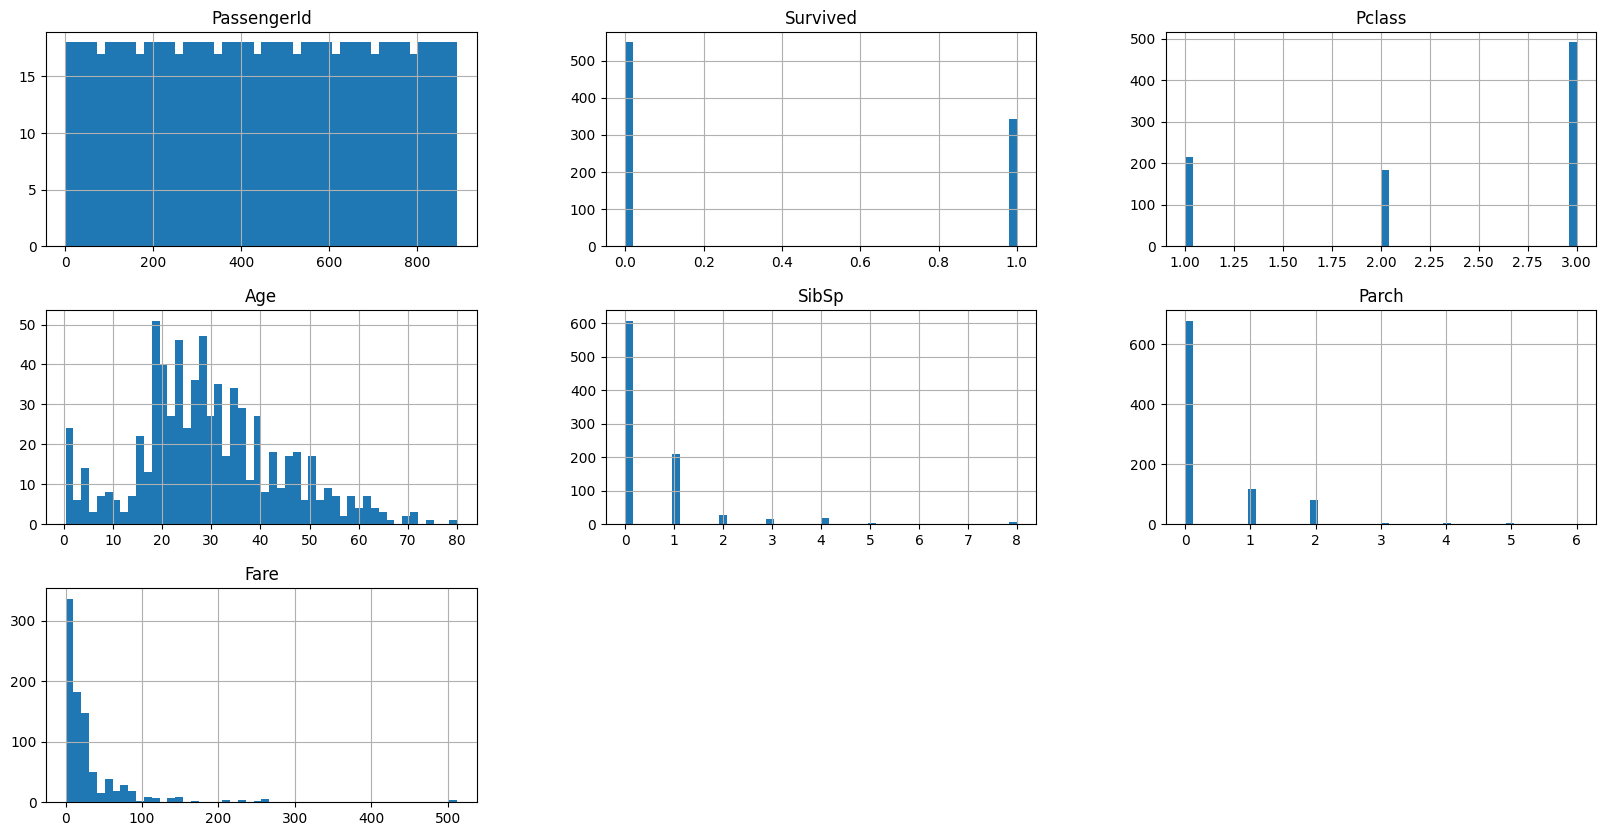

In [ ]:
train_data.hist(bins=50,figsize=(20,10));

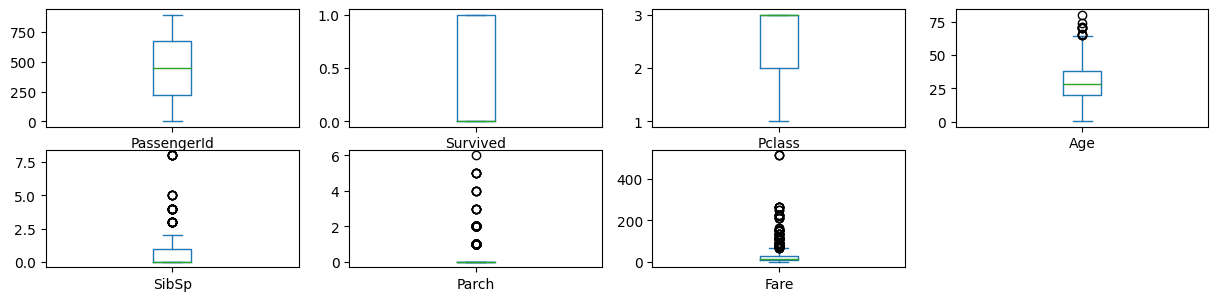

In [ ]:
train_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,7))
plt.show()

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
test = pd.merge(test_data, gender, on='PassengerId', how='inner')
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
def fill_age(data):
  data['Initial']=0
  for i in data:
      data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
  data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
  data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
  data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
  data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
  data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
  data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

fill_age(test)
fill_age(train_data)

In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,33.0,0,0,A.5. 3236,8.0500,NaN,S,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr
416,1308,3,"Ware, Mr. Frederick",male,33.0,0,0,359309,8.0500,NaN,S,0,Mr


In [ ]:
train_data["Embarked"].fillna("S", inplace=True)
test_data["Embarked"].fillna("S", inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
test['Sex']=le.fit_transform(test['Sex'])
train_data['Embarked']=le.fit_transform(train_data['Embarked'])
test['Embarked']=le.fit_transform(test['Embarked'])

In [ ]:
train_data = train_data.drop(['PassengerId','Name','Cabin','Ticket', 'Fare'], axis=1)
test = test.drop(['PassengerId','Name','Cabin','Ticket', 'Fare'], axis=1)

In [ ]:
X_train = train_data.drop(["Survived",'Initial'],axis=1)
Y_train = train_data["Survived"]

X_test  = test.drop(["Survived",'Initial'],axis=1).copy()
Y_test  = test["Survived"]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)

lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

lr.score(X_train, Y_train)

0.8002244668911336

In [ ]:
lr.score(X_test, Y_test)

0.930622009569378

In [ ]:
Y_pred =lr.predict(X_test)
df = pd.DataFrame({"Y_test": Y_test , "Y_pred" : Y_pred})


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.06937799043062201
Root Mean Squared Error: 0.2633970205424162
R-squared: 0.700187969924812


Accuracy: 0.930622009569378
Confusion Matrix:
[[250  16]
 [ 13 139]]


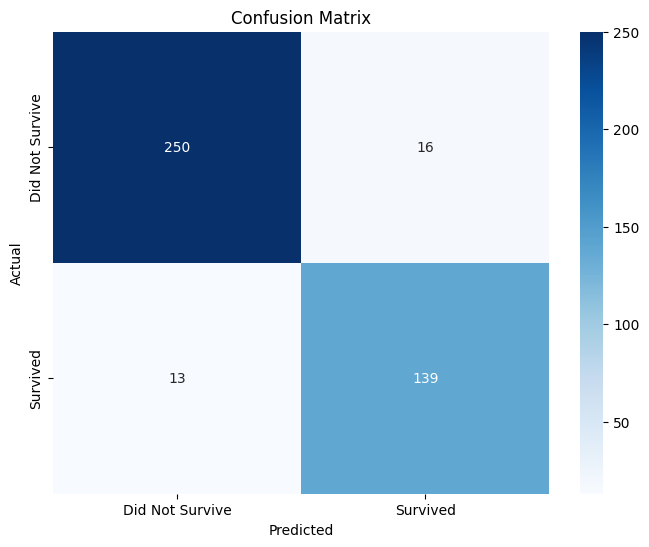

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.91      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418

    Feature  Coefficient
1       Sex    -2.599025
0    Pclass    -1.146293
3     SibSp    -0.326960
5  Embarked    -0.232110
4     Parch    -0.067016
2       Age    -0.042006


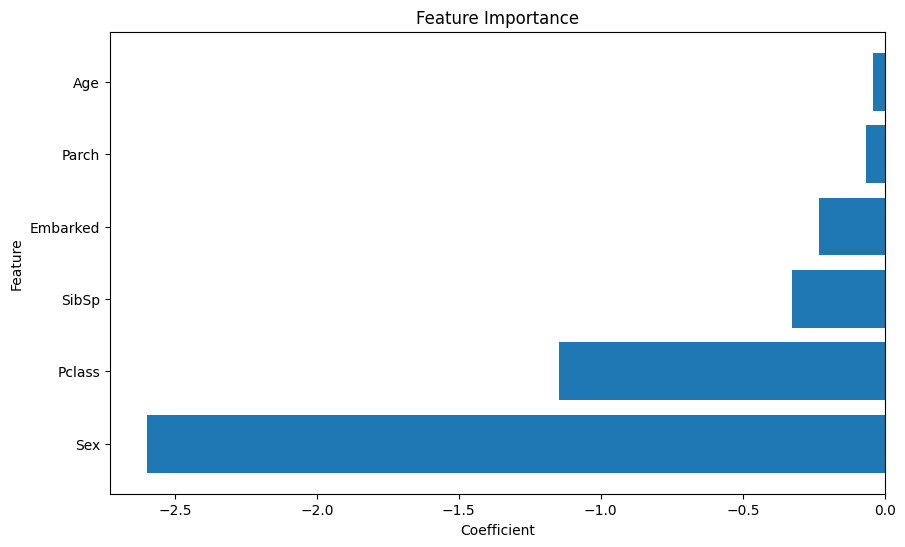

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


class_report = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{class_report}')


coefficients = lr.coef_[0]
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
print(coef_df[['Feature', 'Coefficient']])


plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
input_features = {
    "Pclass": 3,
    "Sex": "male",
    "Age": 22.0,
    "SibSp": 1,
    "Parch": 0,
    "Embarked": "S"
}

input_df = pd.DataFrame([input_features])

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

input_df['Sex'] = le_sex.fit_transform(input_df['Sex'])
input_df['Embarked'] = le_embarked.fit_transform(input_df['Embarked'])

prediction = lr.predict(input_df)

prediction = prediction[0]

print(f"Predicted survival: {'Survived' if prediction == 1 else 'Did not survive'}")

Predicted survival: Survived
